* * *
<pre> NYU Paris            <i> Artificial intelligence - Fall 2023 </i></pre>
* * *


<h1 align="center"> Lab 4: The monolayer perceptron </h1>

<pre align="left"> September 21st 2023               <i> Author: Hicham Janati </i></pre>
* * *


##### Goals:
- Implement your first classifier
- Understand the concept of model complexity


Let's a generate a simple toy dataset.

In [1]:
from sklearn.datasets import make_blobs
import numpy as np
X, y = make_blobs(n_samples=100, centers=2, n_features=2, cluster_std=0.3, random_state=0)

labels = y.copy()
y[y==0] = -1

print("Shape of the data", X.shape)
print("labels:", y)

Shape of the data (100, 2)
labels: [ 1  1 -1 -1  1 -1 -1  1 -1  1 -1  1 -1 -1  1  1  1 -1  1  1 -1 -1  1 -1
  1 -1  1 -1 -1  1  1 -1  1  1  1 -1  1  1 -1  1 -1 -1 -1 -1  1  1  1  1
 -1 -1  1  1 -1 -1 -1 -1 -1  1  1  1  1 -1 -1  1 -1  1 -1 -1  1 -1 -1  1
  1 -1 -1 -1  1  1 -1 -1  1 -1 -1 -1 -1 -1  1 -1  1  1  1  1  1  1 -1 -1
  1  1 -1  1]


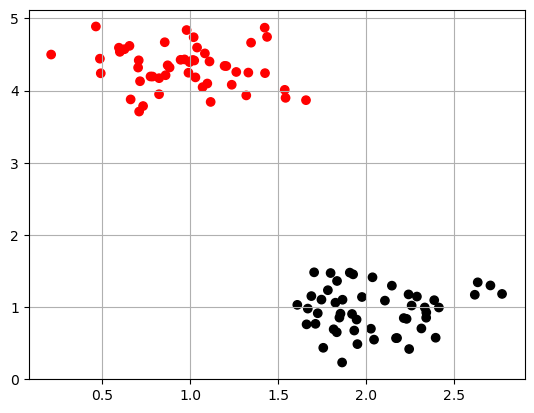

In [2]:
from matplotlib import pyplot as plt
colors = ["red", "black"]
scatter_colors = np.array(colors)[labels]

plt.figure()
plt.scatter(X[:, 0], X[:, 1], color=scatter_colors)
plt.grid()
plt.show()

A monolayer perceptron is a geometric method that performs classification using a linear decision function of the form:
$$ f(x) = \langle w, x\rangle + \theta$$
or with a different notation:
$$ f(x) = w^\top x + \theta$$


### Question 1

Given a sample $x$, a prediction is then given by taking the sign of $f$:

$ prediction(x) = 1$ if $f(x) \geq 0$ and -1 if $f(x) < 0$.

Complete the function below that performs gradient descent to optimize the parameters $w$ and $\theta$.

The loss function that we minimize is:

$$l_i(w) = max(0, -y_i \sum_{i=1}^n (x_i w + \theta))$$

Hint: Take a look at the lectures slides to refresh your memory on how to update the parameters

In [16]:
def plot(w, theta, X, next_point_index=None, cmap='Paired_r'):
    h = 0.005
    x_min, x_max = X[:,0].min() - h, X[:,0].max() + h
    y_min, y_max = X[:,1].min() - h, X[:,1].max() + h
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = np.sign(np.c_[xx.ravel(), yy.ravel()].dot(w) + theta)
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(5,5))
    plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.25)
    plt.contour(xx, yy, Z, colors='k', linewidths=0.7)
    plt.scatter(X[:, 0], X[:, 1], color=scatter_colors)
    if next_point_index is not None:
        plt.scatter(X[next_point_index, 0], X[next_point_index, 1], color="gold")
    plt.show()

def gradient_descent(X, y, step_size=0.01, n_iter=10000):
    n_samples, n_features = X.shape
    # do initialization
    w = np.zeros(n_features)
    theta = 0.
    for t in range(n_iter):
        for ii in range(n_samples):
            # for each sample, if its an error do gradient step
            gradient_w=-y[ii]*X[ii]
            gradient_theta=-y[ii]
            if y[ii] * (w.dot(X[ii])+theta)<=0:
                converged=False
                plot(w, theta, X, ii)
                w=w-step_size*gradient_w
                theta=theta-step_size*gradient_theta
        if converged:
            break
    plot(w, theta, X, ii)
    print(f"Did {t} iterations")
    return w, theta


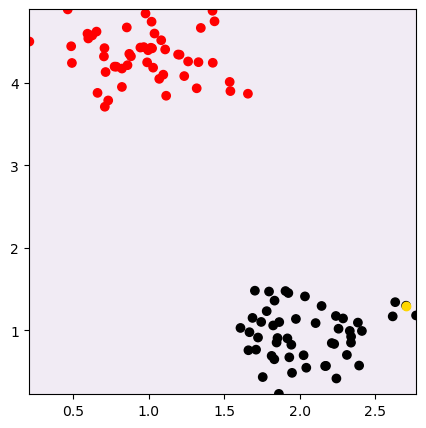

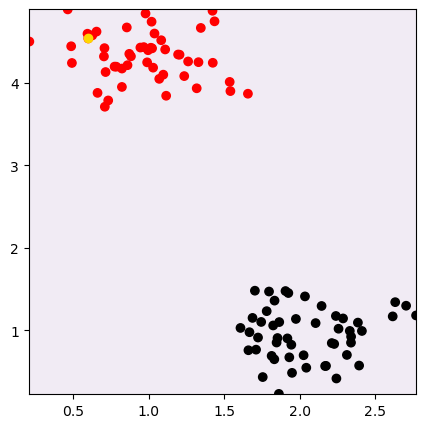

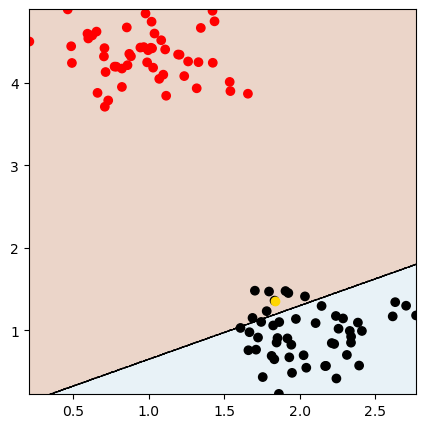

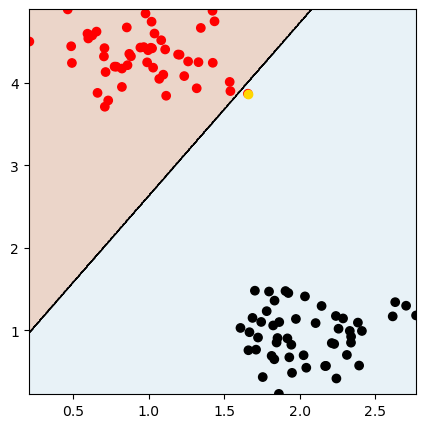

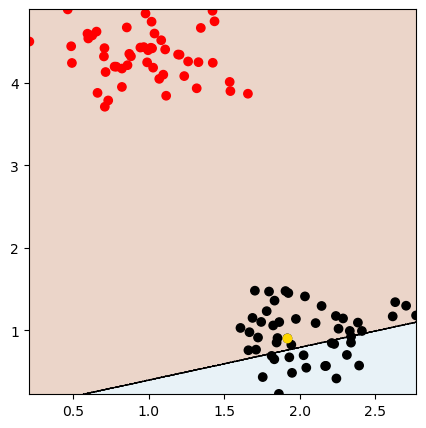

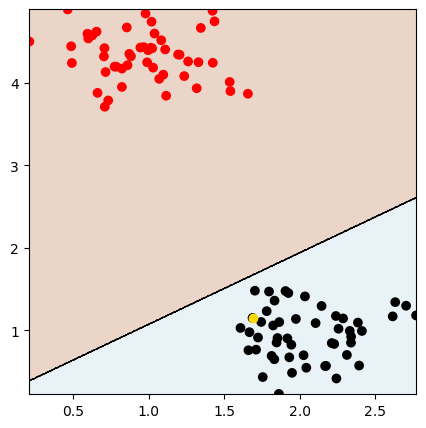

Did 99 iterations


In [11]:
w,theta=gradient_descent(X, y, n_iter=100)

### Question 2
The funciton $f$ is parametrized using one slope vector $w$ and the offset scalar $\theta$.
Can you think of a change of variable and change to the data X such that this parametrization is reduced to only one parameter $w$ to get a function of the form:

$$ f(x) = w^\top x$$ 

### Question 3
Implement this change in your model and update the gradient descent function accordingly.

In [18]:
ones=np.ones((len(X), 1))

In [20]:
X_prime=np.hstack((X, ones))
X_prime[:5]

array([[2.70423831, 1.29862204, 1.        ],
       [1.71102693, 0.76631765, 1.        ],
       [0.60043147, 4.53703443, 1.        ],
       [0.70993435, 3.70954839, 1.        ],
       [2.41167646, 0.99274644, 1.        ]])

In [38]:
def gradient_descent(X, y, step_size=0.01, n_iter=10000):
    n_samples, n_features = X.shape
    # do initialization
    w = np.zeros(n_features + 1)
    
    #stacking
    ones=np.ones((n_samples, 1))
    X_prime=np.hstack((X, ones))
    
    
    for t in range(n_iter):
        converged=True
        for ii in range(n_samples):
            # for each sample, if its an error do gradient step
            gradient_w= -y[ii] * X_prime[ii]
            #gradient_theta=-y[ii]
            if y[ii] * (w.dot(X_prime[ii])) <= 0:
                converged=False
                plot(w[:-1],w[-1], X, ii)
                w=w-step_size*gradient_w
                #theta=theta-step_size*gradient_theta
        if converged:
            break
    plot(w[:-1],w[-1], X, ii)
    print(f"Did {t} iterations")
    return w


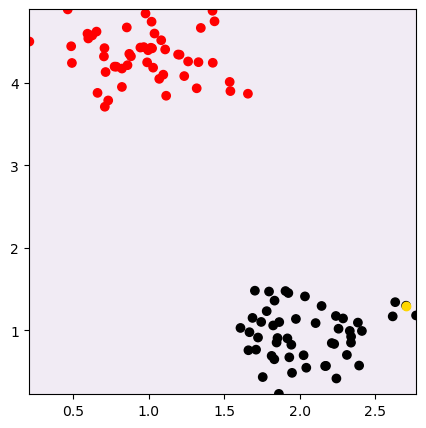

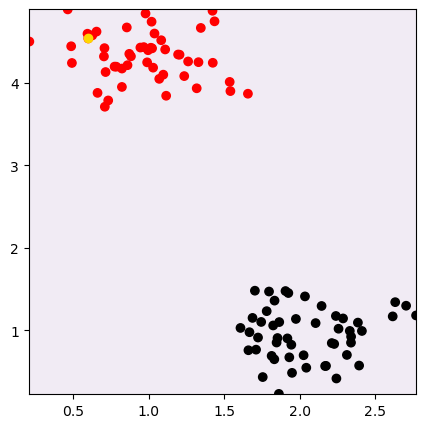

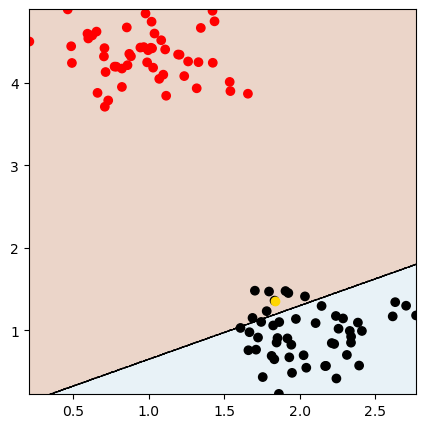

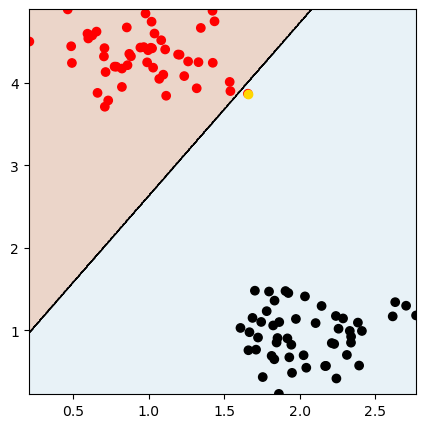

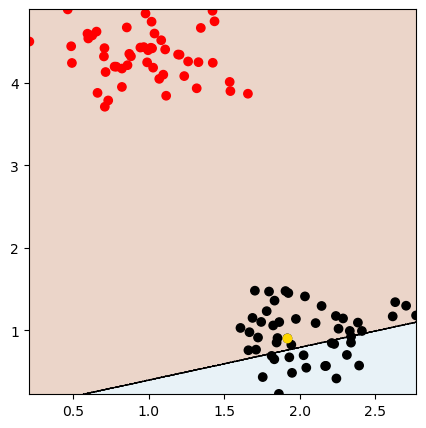

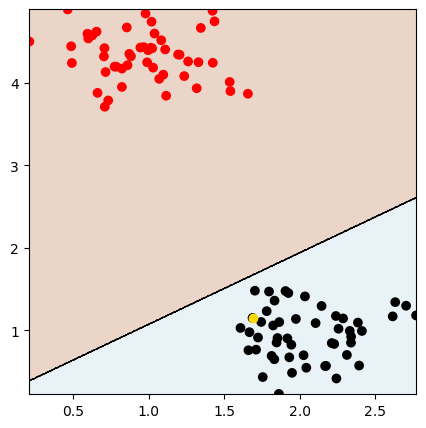

Did 1 iterations


In [44]:
w=gradient_descent(X,y)

### Question 4
Write a function that uses the learned parameters to make predictions.

In [45]:
def predict(x, w):
    score=X.dot(w[:-1])+w[-1]
    
    return np.sign(score)
predict(X,w)-y #compare to y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

### Question 5
Time to write a proper classifier object that following the sklearn API. We import the sklearn BaseEstimator model and customize it with our gradient descent function. Complete the following cell:

In [46]:
from sklearn.base import BaseEstimator

class Perceptron(BaseEstimator):
    def __init__(self, step_size=0.1, n_iter=1000):
        self.step_size = step_size
        self.n_iter = n_iter
    
    def fit(self, X, y): #optimization
        # TODO
        w=gradient_descent(X,y,step_size=self.step_size, n_iter=self.n_iter)
        
        
        
        
    def predict(self, X): #able to make a prediction
        # TO DO
        score=X.dot(self.w[:-1])+w[-1] #w is not known
        return np.sign(score)
        

    def plot_decision_boundary(self, X):
        # TODO
        plot(self.w[:1], self.w[:-1], X)
        
        

### Question 6
Time to properly evaluate our model. Divide the data into train-test.
Create an instance of your perceptron, train it on the data and compute a test accuracy score. 

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)


### Question 7:
Complete the code below to plot the accuracy curve for a list of `train_size`. What do you notice ?

In [ ]:
train_sizes = np.linspace(0.1, 0.9, 10)

accuracies = []

for test_size in train_sizes:
    accuracies.append(train_size)
    ##
    
